# PHD hackathon

### Problem statement

### Process flow

### Data extraction

In [518]:
#!pip install requests

In [519]:
#import requests
#import time

In [520]:
headers = {
'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
'X-Requested-With': 'XMLHttpRequest',
}

In [521]:
url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'

In [522]:
payload = {
'direction': 'next',
'endCursor': '',
'startCursor': '',
}

In [523]:
s = requests.Session()

In [524]:
r = s.get(url, headers=headers, params=payload) # GET Call
data = r.json()

In [525]:
data

{'pageInfo': {'hasNextPage': True,
  'hasPreviousPage': False,
  'endCursor': 'eyJyZWFsbV91c2VySWQiOiJGYW5kYW5nb19BMkEzOTc5MC01RTk4LTQyMUItOEIxMi1CRDIzNTE3MDg1Q0MiLCJlbXNJZCI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZSIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjkwNTdjMmNmLTdjYWItMzE3Zi04NzZmLWU1MGIyNDVjYTc2ZV9UIiwiY3JlYXRlRGF0ZSI6IjIwMTktMDgtMTlUMDg6MDQ6MjcuMjY3WiJ9',
  'startCursor': None},
 'reviews': [{'rating': 'STAR_3_5',
   'review': 'Loved the movie. Our four year old was not as impressed. Our seven year old did enjoy it.',
   'displayName': 'Dawn',
   'displayImageUrl': None,
   'isVerified': True,
   'isSuperReviewer': False,
   'hasSpoilers': False,
   'hasProfanity': False,
   'createDate': '2019-08-19T11:19:15.683Z',
   'updateDate': '2019-08-19T11:19:15.786Z',
   'user': {'userId': '1870c856-d68d-4c40-a1ef-d226bb239c2e',
    'realm': 'Fandango',
    'displayName': 'Dawn',
    'accountLink': None},
   'score': 3.5,
   'timeFromCreation': '5m ago'},
  {'rating': 'STAR_5',

In [526]:
endCursor = ''
startCursor = ''
df_reviews = pd.DataFrame(columns = data["reviews"][0].keys())
for i in range(0,300):
    payload = {
                'direction': 'next',
                'endCursor': endCursor,
                'startCursor': startCursor,
                }
    r = s.get(url, headers=headers, params=payload) # GET Call
    data = r.json()
    time.sleep(5)
    df_new = pd.DataFrame.from_dict(data["reviews"])
    df_reviews = df_reviews.append(df_new)
    endCursor = data["pageInfo"]['endCursor']
    startCursor = data["pageInfo"]['startCursor']

KeyboardInterrupt: 

In [ ]:

#type(data)
df_reviews

In [ ]:
df_reviews.to_csv("/Users/pavankumar/Downloads/data.csv")

### Initial processing and exploration

In [1181]:
#read the dataset
import pandas as pd
reveiws=pd.read_csv("/Users/pavankumar/Downloads/phd/data.csv",index_col=None)

In [1182]:
reveiws.head()

,Unnamed: 0,rating,review,name,displayImageUrl,verified,super_reviewer,spoilers,profanity,createdate,updateDate,user,score,timeFromCreation
0,0,STAR_5,Every dog lover will absolutely love this movie,Glen Sexton,NaN,False,False,False,False,2019-08-19T03:22:28.221Z,2019-08-19T03:22:28.221Z,{'userId': 'F5968345-E0C2-4EF8-9084-D8CF5D3FE5...,5.0,16m ago
1,1,STAR_5,Nothing like the original but still good,luis,NaN,True,False,False,False,2019-08-19T03:22:12.135Z,2019-08-19T03:22:12.135Z,{'userId': 'F7EB98BA-24B6-4EA9-8A37-E98C4FC25A...,5.0,16m ago
2,2,STAR_4,Pretty much a faithful retelling on the animat...,Roy Batty,NaN,False,False,False,False,2019-08-19T03:07:44.851Z,2019-08-19T03:07:44.851Z,{'userId': '8a4ba961-92ad-491c-b015-3dc72977d4...,4.0,31m ago
3,3,STAR_3_5,The original story line was there and the movi...,Laura F,NaN,False,False,False,False,2019-08-19T03:01:01.210Z,2019-08-19T03:01:01.210Z,{'userId': '7cf5b9e3-8531-46d9-8778-8f584cf866...,3.5,38m ago
4,4,STAR_4,"there is nothing bad about the movie, I just f...",Michael Kurtz,NaN,True,False,False,False,2019-08-19T02:54:18.741Z,2019-08-19T02:54:18.741Z,{'userId': '6D6FAD9D-42F6-4FF4-BDE2-12055717EB...,4.0,44m ago


In [1183]:
#checking for duplicate users
reveiws['user'].duplicated().any()

False

In [1184]:
#drop unneccesary columns
reveiws.drop(['rating','displayImageUrl','createdate','updateDate','timeFromCreation'],axis=1,inplace=True)

In [1185]:
reveiws.drop(['Unnamed: 0','name','user'],axis=1,inplace=True)

In [1186]:
reveiws.dtypes

review             object
verified             bool
super_reviewer       bool
spoilers             bool
profanity            bool
score             float64
dtype: object

In [1187]:
reveiws.isnull().sum()

review            0
verified          0
super_reviewer    0
spoilers          0
profanity         0
score             0
dtype: int64

In [1188]:
reveiws['verified'].value_counts()

True     2158
False     842
Name: verified, dtype: int64

In [1189]:
#rename columns
reveiws.rename(columns={'score': 'rating'}, inplace=True)

In [1190]:
#using map function to convert column values to numeric
reveiws['super_reviewer'] = reveiws['super_reviewer'].map({False:0,True:1})
                                                                   

In [1191]:
reveiws['verified'] = reveiws['verified'].map({False:0,True:1})

In [1192]:
reveiws['spoilers'] = reveiws['spoilers'].map({False:0,True: 1})

In [1193]:
reveiws['profanity'] = reveiws['profanity'].map({False:0,True: 1})

In [1194]:
reveiws.head()

,review,verified,super_reviewer,spoilers,profanity,rating
0,Every dog lover will absolutely love this movie,0,0,0,0,5.0
1,Nothing like the original but still good,1,0,0,0,5.0
2,Pretty much a faithful retelling on the animat...,0,0,0,0,4.0
3,The original story line was there and the movi...,0,0,0,0,3.5
4,"there is nothing bad about the movie, I just f...",1,0,0,0,4.0


In [1195]:
reveiws.describe(include='all')

,review,verified,super_reviewer,spoilers,profanity,rating
count,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,2995,NaN,NaN,NaN,NaN,NaN
top,Great movie for all ages,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.719333,0.000333,0.000667,0.010667,3.918167
std,NaN,0.449400,0.018257,0.025816,0.102744,1.313314
min,NaN,0.000000,0.000000,0.000000,0.000000,0.500000
25%,NaN,0.000000,0.000000,0.000000,0.000000,3.000000
50%,NaN,1.000000,0.000000,0.000000,0.000000,4.500000
75%,NaN,1.000000,0.000000,0.000000,0.000000,5.000000


In [1196]:
reveiws[reveiws['review']=='Great movie for all ages']

,review,verified,super_reviewer,spoilers,profanity,rating
591,Great movie for all ages,1,0,0,0,5.0
990,Great movie for all ages,1,0,0,0,5.0


In [673]:
#checking counts to gain insights
reveiws['spoilers'].value_counts()

0    2998
1       2
Name: spoilers, dtype: int64

In [674]:
reveiws['profanity'].value_counts()

0    2968
1      32
Name: profanity, dtype: int64

In [675]:
reveiws['verified'].value_counts()

1    2158
0     842
Name: verified, dtype: int64

In [676]:
#verified users
ver=reveiws.loc[reveiws['verified']==1]

In [677]:
#not verified users
not_ver=reveiws.loc[reveiws['verified']==0]

In [1124]:
reveiws['rating'].describe()

count    3000.000000
mean        3.918167
std         1.313314
min         0.500000
25%         3.000000
50%         4.500000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [678]:
not_ver['rating'].describe()

count    842.000000
mean       3.247625
std        1.522374
min        0.500000
25%        2.000000
50%        3.500000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [679]:
ver['rating'].describe()

count    2158.000000
mean        4.179796
std         1.118239
min         0.500000
25%         3.500000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

Text(0.5, 1.0, 'rating comparison of verified and non-verified users')

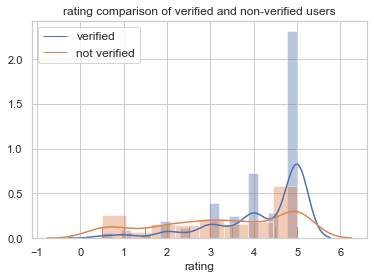

In [774]:
import numpy as np
import matplotlib.pyplot as plt 

plt.figure()
sns.distplot(ver['rating'], hist=True, rug=True)
sns.distplot(not_ver['rating'], hist=True, rug=True)
plt.legend(['verified', 'not verified'],fontsize=12)
plt.title("rating comparison of verified and non-verified users")

In [681]:
reveiws['super_reviewer'].value_counts()

0    2999
1       1
Name: super_reviewer, dtype: int64

In [682]:
reveiws[reveiws['super_reviewer'] ==1]

,review,verified,super_reviewer,spoilers,profanity,rating
1310,"Well, the original was better. It's fine, and...",0,1,0,0,3.0


In [683]:
reveiws[reveiws['spoilers'] ==1]

,review,verified,super_reviewer,spoilers,profanity,rating
2738,More like a nature documentary. Film did not n...,0,0,1,0,2.0
2824,Man... where do I start with this one... I cam...,0,0,1,0,1.5


### Preprocessing and Data preparation

In [1164]:
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [1165]:
reveiws.shape


(3000, 6)

In [1166]:
#cleaning text

In [1167]:
cleaned_text=[]

In [1168]:
from nltk.corpus import RegexpTokenizer as regextoken

In [1198]:

#function to tokenize, stopword removal and extract adjectives
def cleanme(text):
    sent = text.lower()
    wrds = word_tokenize(sent)

    clwrds = [w for w in wrds if not w in stopwords.words('english')]
    ln = len(clwrds)
    pos = pd.DataFrame(pos_tag(wrds))
    pos = " ".join(list(pos[pos[1].str.contains("JJ")].iloc[:,0]))
    rt = [ln, " ".join(clwrds), pos]
    return(rt)

In [1199]:
for i in range(0,3000):
    text=reveiws['review'][i]
    a=cleanme(text)
    cleaned_text.append(a)
    
    

In [1316]:
cleaned_text[1]

[5, 'nothing like original still good', 'original good']

In [1201]:
#remove punctuation through regular expression and create new column
regex=regextoken('\w+')


In [1202]:
reveiws['review-short']=0

In [1203]:
for i in range(0,3000):
    x=regex.tokenize(cleaned_text[i][1])
    reveiws['review-short'][i]=x

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1204]:
reveiws['review-short'][1]

['nothing', 'like', 'original', 'still', 'good']

In [1205]:
reveiws.head()

,review,verified,super_reviewer,spoilers,profanity,rating,review-short
0,Every dog lover will absolutely love this movie,0,0,0,0,5.0,"[every, dog, lover, absolutely, love, movie]"
1,Nothing like the original but still good,1,0,0,0,5.0,"[nothing, like, original, still, good]"
2,Pretty much a faithful retelling on the animat...,0,0,0,0,4.0,"[pretty, much, faithful, retelling, animated, ..."
3,The original story line was there and the movi...,0,0,0,0,3.5,"[original, story, line, movie, gave, feels, ne..."
4,"there is nothing bad about the movie, I just f...",1,0,0,0,4.0,"[nothing, bad, movie, felt, enjoyed, original]"


In [1206]:
reveiws['len']=0

In [1207]:
#creating another column for reveiw length and adjectives

In [1208]:
for i in range(0,3000):
    reveiws['len'][i]=cleaned_text[i][0]

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1209]:
reveiws['adjectives']=0

In [1210]:
for i in range(0,3000):
    reveiws['adjectives'][i]=cleaned_text[i][2]

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1211]:
reveiws.head()

,review,verified,super_reviewer,spoilers,profanity,rating,review-short,len,adjectives
0,Every dog lover will absolutely love this movie,0,0,0,0,5.0,"[every, dog, lover, absolutely, love, movie]",6,
1,Nothing like the original but still good,1,0,0,0,5.0,"[nothing, like, original, still, good]",5,original good
2,Pretty much a faithful retelling on the animat...,0,0,0,0,4.0,"[pretty, much, faithful, retelling, animated, ...",44,faithful animated classic new different origin...
3,The original story line was there and the movi...,0,0,0,0,3.5,"[original, story, line, movie, gave, feels, ne...",22,original much nat half
4,"there is nothing bad about the movie, I just f...",1,0,0,0,4.0,"[nothing, bad, movie, felt, enjoyed, original]",7,bad original more


In [703]:
reveiws['len'].describe()

count    3000.000000
mean       17.313333
std        26.474367
min         1.000000
25%         6.000000
50%        11.000000
75%        19.000000
max       485.000000
Name: len, dtype: float64

In [704]:
reveiws['adjectives'].describe()

count     3000
unique    2015
top           
freq       288
Name: adjectives, dtype: object

### Visualization and insights

In [762]:
import seaborn as sns
import matplotlib.pyplot as plt

In [707]:
#disrtibution plot

Text(0.5, 1.0, 'distribution of reveiw length')

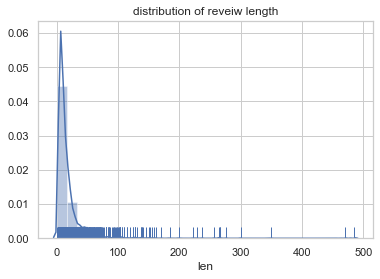

In [767]:
fig = plt.figure
sns.distplot(reveiws['len'],kde=True, bins=30,rug=1);
plt.title('distribution of reveiw length')

In [709]:
reveiws.head()

,review,verified,super_reviewer,spoilers,profanity,rating,review-short,len,adjectives
0,Every dog lover will absolutely love this movie,0,0,0,0,5.0,"[every, dog, lover, absolutely, love, movie]",6,
1,Nothing like the original but still good,1,0,0,0,5.0,"[nothing, like, original, still, good]",5,original good
2,Pretty much a faithful retelling on the animat...,0,0,0,0,4.0,"[pretty, much, faithful, retelling, animated, ...",44,faithful animated classic new different origin...
3,The original story line was there and the movi...,0,0,0,0,3.5,"[original, story, line, movie, gave, feels, ne...",22,original much nat half
4,"there is nothing bad about the movie, I just f...",1,0,0,0,4.0,"[nothing, bad, movie, felt, enjoyed, original]",7,bad original more


Text(0.5, 1.0, 'distribution of rating')

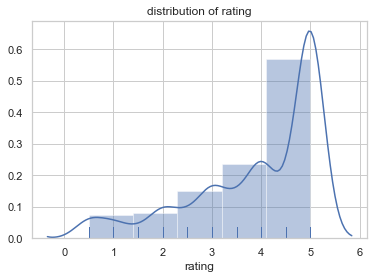

In [768]:
#distribution of rating
sns.distplot(reveiws['rating'],kde=True,bins=5,rug=1);
plt.title("distribution of rating")

Text(0.5, 1.0, 'distribution of rating')

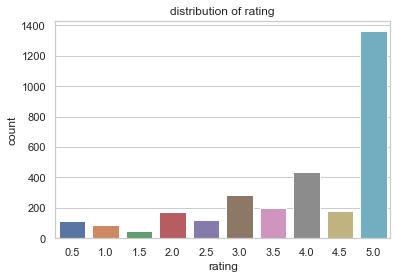

In [769]:
sns.countplot(x="rating",data=reveiws)
plt.title("distribution of rating")

In [168]:
reveiws['rating'].value_counts()

5.0    1361
4.0     437
3.0     286
3.5     196
4.5     176
2.0     171
2.5     122
0.5     113
1.0      90
1.5      48
Name: rating, dtype: int64

In [169]:
reveiws[reveiws['rating']>3].count()

review            2170
verified          2170
super_reviewer    2170
spoilers          2170
profanity         2170
rating            2170
review-short      2170
len               2170
adjectives        2170
dtype: int64

In [170]:
#pie chart with binning
#used [0-1], (1,2], (2,3,(3,4],(4,]

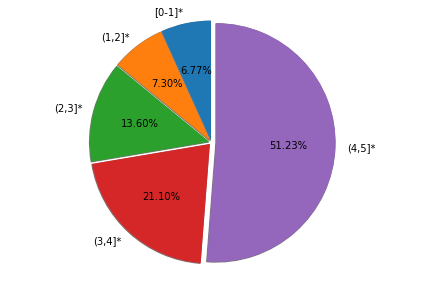

In [171]:
import matplotlib.pyplot as plt
#used [0-1], (1,2], ()
# Pie chart
labels = ['[0-1]*', '(1,2]*', '(2,3]*', '(3,4]*','(4,5]*']
sizes = [90+113,48+171,286+122,437+196,176+1361]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0.1, 0.1, 0.1,0.2)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90,radius=5)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [172]:
reveiws.loc[reveiws['len']>300]

,review,verified,super_reviewer,spoilers,profanity,rating,review-short,len,adjectives
574,Soooooo Lion King. Yeaaaaaa. I've got a rant w...,1,0,0,1,2.0,"[soooooo, lion, king, yeaaaaaa, ve, got, rant,...",349,soooooo i original other super disappointing r...
2735,If you could think which Disney classic seems ...,0,0,0,0,4.5,"[could, think, disney, classic, seems, masterp...",485,more majestic outstanding animated questionabl...
2824,Man... where do I start with this one... I cam...,0,0,1,0,1.5,"[man, start, one, came, film, hearing, good, t...",470,good bad i open i hard many new subtle more wo...


In [173]:
#add new columns number of adjectives and target variable

In [1212]:
reveiws['adj-count']= reveiws['adjectives'].apply(lambda x: len(x.split()))

In [1213]:
reveiws['user_sentiment']=reveiws['rating'].apply(lambda x: 0 if x>3 else 1)

In [716]:
reveiws.shape

(3000, 11)

In [1214]:
reveiws.head()

,review,verified,super_reviewer,spoilers,profanity,rating,review-short,len,adjectives,adj-count,user_sentiment
0,Every dog lover will absolutely love this movie,0,0,0,0,5.0,"[every, dog, lover, absolutely, love, movie]",6,,0,0
1,Nothing like the original but still good,1,0,0,0,5.0,"[nothing, like, original, still, good]",5,original good,2,0
2,Pretty much a faithful retelling on the animat...,0,0,0,0,4.0,"[pretty, much, faithful, retelling, animated, ...",44,faithful animated classic new different origin...,15,0
3,The original story line was there and the movi...,0,0,0,0,3.5,"[original, story, line, movie, gave, feels, ne...",22,original much nat half,4,0
4,"there is nothing bad about the movie, I just f...",1,0,0,0,4.0,"[nothing, bad, movie, felt, enjoyed, original]",7,bad original more,3,0


In [178]:
# create bigrams column

In [717]:
from textblob import TextBlob 

In [1215]:
reveiws['ngrams']=reveiws['review'].apply(lambda x:TextBlob(x))
reveiws['ngrams']=reveiws['ngrams'].apply(lambda x:x.ngrams(n=2))

#### Getting Polarity, subjectivity and sentiment intensity scores from the libraries textblob and vader

In [1216]:

#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [1217]:
reveiws['polarity']=reveiws['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [1218]:
reveiws['subjectivity']=reveiws['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [1219]:
#create new column with vader-sentiment intensity score

In [1220]:
reveiws['vader-score']=reveiws['review'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x))

In [1221]:
reveiws['vader-score']=reveiws['vader-score'].apply(lambda x:x['compound'])

In [1222]:
#negligible variance
reveiws.drop(['spoilers','super_reviewer'],axis=1,inplace=True)

In [1223]:
reveiws.head()

,review,verified,profanity,rating,review-short,len,adjectives,adj-count,user_sentiment,ngrams,polarity,subjectivity,vader-score
0,Every dog lover will absolutely love this movie,0,0,5.0,"[every, dog, lover, absolutely, love, movie]",6,,0,0,"[[Every, dog], [dog, lover], [lover, will], [w...",0.500000,0.600000,0.8516
1,Nothing like the original but still good,1,0,5.0,"[nothing, like, original, still, good]",5,original good,2,0,"[[Nothing, like], [like, the], [the, original]...",0.537500,0.675000,0.4242
2,Pretty much a faithful retelling on the animat...,0,0,4.0,"[pretty, much, faithful, retelling, animated, ...",44,faithful animated classic new different origin...,15,0,"[[Pretty, much], [much, a], [a, faithful], [fa...",0.148844,0.605521,-0.4398
3,The original story line was there and the movi...,0,0,3.5,"[original, story, line, movie, gave, feels, ne...",22,original much nat half,4,0,"[[The, original], [original, story], [story, l...",0.089583,0.379167,0.1655
4,"there is nothing bad about the movie, I just f...",1,0,4.0,"[nothing, bad, movie, felt, enjoyed, original]",7,bad original more,3,0,"[[there, is], [is, nothing], [nothing, bad], [...",0.168750,0.654167,0.8151


In [ ]:
#converting format to str

In [1224]:
reveiws['review-short'] = [' '.join(map(str, l)) for l in reveiws['review-short']]

In [190]:
#corelation plot

In [1317]:
import seaborn as sns
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr=reveiws.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,verified,profanity,rating,len,adj-count,user_sentiment,polarity,subjectivity,vader-score,scores_cluster,cluster_label
verified,1,-0.036,0.32,-0.25,-0.24,-0.28,0.21,0.11,0.11,-0.12,0.14
profanity,-0.036,1,-0.097,0.11,0.094,0.074,-0.081,-0.0072,-0.061,0.045,-0.02
rating,0.32,-0.097,1,-0.22,-0.22,-0.87,0.54,0.25,0.44,-0.43,0.26
len,-0.25,0.11,-0.22,1,0.94,0.21,-0.19,-0.099,0.12,-0.049,-0.12
adj-count,-0.24,0.094,-0.22,0.94,1,0.21,-0.2,-0.092,0.14,-0.062,-0.15
user_sentiment,-0.28,0.074,-0.87,0.21,0.21,1,-0.47,-0.23,-0.38,0.37,-0.22
polarity,0.21,-0.081,0.54,-0.19,-0.2,-0.47,1,0.44,0.55,-0.59,0.28
subjectivity,0.11,-0.0072,0.25,-0.099,-0.092,-0.23,0.44,1,0.21,-0.31,0.18
vader-score,0.11,-0.061,0.44,0.12,0.14,-0.38,0.55,0.21,1,-0.86,0.19
scores_cluster,-0.12,0.045,-0.43,-0.049,-0.062,0.37,-0.59,-0.31,-0.86,1,-0.19


### some more plots

In [728]:
import numpy as np
import matplotlib as plt 

ver1=reveiws.loc[reveiws['verified']==1]
notver2=reveiws.loc[reveiws['verified']==0]


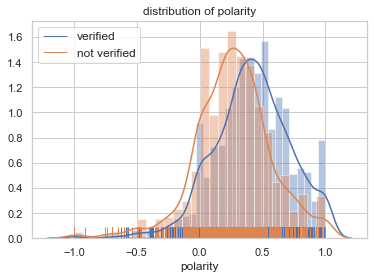

In [776]:

sns.distplot(ver1['polarity'], hist=True, rug=True)
sns.distplot(notver2['polarity'], hist=True, rug=True)
plt.title("distribution of polarity")
plt.legend(['verified', 'not verified'],fontsize=12)

Text(0.5, 1.0, 'distribution of vader-score')

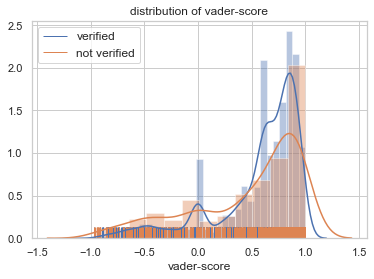

In [782]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
fig = plt.figure()
sns.distplot(ver1['vader-score'], hist=True, rug=True,axlabel='verified')
sns.distplot(notver2['vader-score'], hist=True, rug=True)
plt.legend(['verified', 'not verified'],fontsize=12)
plt.title("distribution of vader-score")

Text(0.5, 1.0, 'polarity-rating trend')

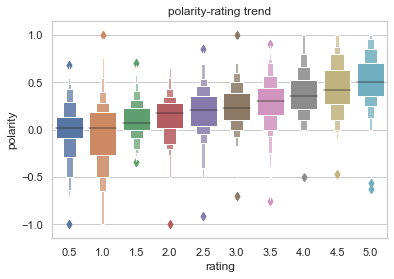

In [785]:
import matplotlib.pyplot as plt 
fig = plt.figure()
sns.boxenplot(x=reveiws['rating'], y=reveiws['polarity'], data=reveiws)
plt.title("polarity-rating trend")


Text(0.5, 1.0, 'reveiw length-rating trend')

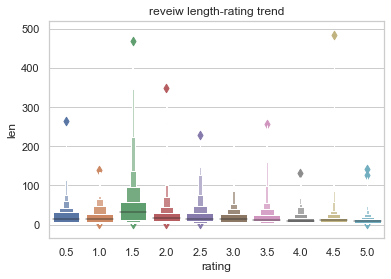

In [793]:
fig = plt.figure()
sns.boxenplot(x=reveiws['rating'], y=reveiws['len'], data=reveiws)
plt.title("reveiw length-rating trend")

Text(0.5, 1.0, 'distribution of subjectivity')

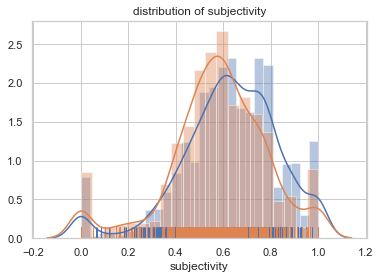

In [786]:
sns.distplot(ver1['subjectivity'], hist=True, rug=True,axlabel='verified')
sns.distplot(notver2['subjectivity'], hist=True, rug=True)
plt.title("distribution of subjectivity")

In [209]:
import nltk
from nltk.stem import WordNetLemmatizer

In [210]:
words = reveiws.review.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(words)
stop_words = set(stopwords.words('english'))
stopwordrmvd = [w for w in tokens if not w in stop_words]
lmt = WordNetLemmatizer()
adj_freq = [lmt.lemmatize(i) for i in reveiws['adjectives']]
word_freq = [lmt.lemmatize(i) for i in reveiws['review-short']]
adj_dist = nltk.FreqDist(adj_freq)
word_dist = nltk.FreqDist(word_freq)


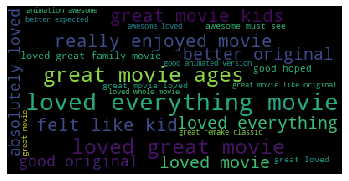

In [1141]:
#most frequent words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(word_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

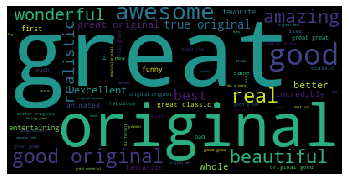

In [212]:
#most frequent adjectives
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(adj_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [213]:
#converting ngrams column format to str

In [1226]:
for i in range (0,3000):
    reveiws['ngrams'][i] = [item for sublist in reveiws['ngrams'][i] for item in sublist]

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1227]:
reveiws['ngrams'] = [' '.join(map(str, l)) for l in reveiws['ngrams']]

In [1228]:
reveiws.head()

,review,verified,profanity,rating,review-short,len,adjectives,adj-count,user_sentiment,ngrams,polarity,subjectivity,vader-score
0,Every dog lover will absolutely love this movie,0,0,5.0,every dog lover absolutely love movie,6,,0,0,Every dog dog lover lover will will absolutely...,0.500000,0.600000,0.8516
1,Nothing like the original but still good,1,0,5.0,nothing like original still good,5,original good,2,0,Nothing like like the the original original bu...,0.537500,0.675000,0.4242
2,Pretty much a faithful retelling on the animat...,0,0,4.0,pretty much faithful retelling animated classi...,44,faithful animated classic new different origin...,15,0,Pretty much much a a faithful faithful retelli...,0.148844,0.605521,-0.4398
3,The original story line was there and the movi...,0,0,3.5,original story line movie gave feels needed lo...,22,original much nat half,4,0,The original original story story line line wa...,0.089583,0.379167,0.1655
4,"there is nothing bad about the movie, I just f...",1,0,4.0,nothing bad movie felt enjoyed original,7,bad original more,3,0,there is is nothing nothing bad bad about abou...,0.168750,0.654167,0.8151


In [1229]:
import nltk
ngram_freq = nltk.FreqDist(reveiws['ngrams'])
ngram_dist = nltk.FreqDist(ngram_freq)

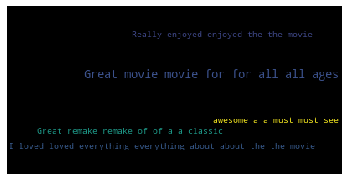

In [1230]:
#most frequent ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(ngram_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### strange observations

In [1136]:
import pandas as pd
exceptions=pd.read_csv("/Users/pavankumar/Downloads/phd/exceptions.csv")

In [1137]:
exceptions=exceptions[exceptions['vader-score']!=0]

In [1138]:
exceptions.shape

(309, 5)

In [1139]:
exceptions.head()

,review,rating,polarity,subjectivity,vader-score
0,Pretty much a faithful retelling on the animat...,4.0,0.148844,0.605521,-0.4398
1,"Soulless and uninspired, I expected at least a...",2.5,-0.117500,0.660000,0.7216
2,"It was just okay. Had to leave, 3 year old cou...",3.0,0.300000,0.350000,-0.1426
3,Not even remotely good as the original,1.5,0.537500,0.675000,-0.0274
5,some good features but nothing like the origin...,2.5,0.537500,0.675000,-0.4867


### Modelling

#### import libraries, X-y split and train-test split

In [493]:
import pandas as pd
import numpy as np
import pickle
import sys
import os
import io
import re
from sys import path

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from string import punctuation, digits
from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from sklearn import metrics
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


In [494]:
#lemmatize the words in corpus
import nltk
from nltk.stem import WordNetLemmatizer
lmt = WordNetLemmatizer()
reveiws['review']= [lmt.lemmatize(word) for word in reveiws['review']]
reveiws['review-short']= [lmt.lemmatize(word) for word in reveiws['review-short']]

In [1244]:
reveiws.drop(['rating'],axis=1,inplace=True)

y=reveiws['user_sentiment']

X=reveiws['review-short']



In [1245]:
X.shape

(3000,)

In [1246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2100,) (900,) (2100,) (900,)


#### 1. Logistic regression

In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [316]:

vectorizer = TfidfVectorizer(ngram_range=(1, 2),use_idf=True)
train_vect=vectorizer.fit_transform(X_train)
test_vect=vectorizer.transform(X_test)
logreg=LogisticRegression()
print(train_vect.shape,test_vect.shape)

(2100, 23790) (900, 23790)


In [322]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(train_vect,y_train)



/Users/pavankumar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [324]:
log_pred=logreg.predict(test_vect)

In [326]:
print(classification_report(y_test,log_pred, digits=2))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       652
           1       0.76      0.28      0.41       248

    accuracy                           0.78       900
   macro avg       0.77      0.62      0.64       900
weighted avg       0.77      0.78      0.74       900



#### 2. Simple neural net

In [927]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, BatchNormalization

input_dim = train_vect.shape[1]  # Number of features

model = Sequential()

model.add(layers.Dense(32, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(layers.Dense(21, input_dim=input_dim, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(layers.Dense(11, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
                                                            
model.add(layers.Dense(5, input_dim=input_dim, activation='tanh'))
model.add(BatchNormalization())

                                                            
model.add(layers.Dense(1, activation='sigmoid'))

W0829 10:29:48.748808 140735876789184 deprecation.py:506] From /Users/pavankumar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [928]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                761312    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 21)                693       
_________________________________________________________________
batch_normalization_2 (Batch (None, 21)                84        
_________________________________________________________________
dropout_2 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 11)                242       
__________

In [929]:
model.fit(train_vect,y_train,epochs=50, verbose=False, batch_size=5)

In [930]:
nn_pred=model.predict_classes(test_vect)

In [931]:
from sklearn.metrics import classification_report
print(classification_report(nn_pred,y_test, digits=2))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       731
           1       0.48      0.71      0.58       169

    accuracy                           0.80       900
   macro avg       0.70      0.77      0.72       900
weighted avg       0.84      0.80      0.82       900



#### 3. Multinomial Naive bayes

In [327]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}



In [334]:
from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=5, scoring="precision")



In [335]:
clf.fit(X_train,y_train)



/Users/pavankumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pavankumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pavankumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pavankumar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pavankumar/anaconda3/lib/

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [330]:
p=clf.predict(X_test)

In [331]:
print(classification_report(y_test, p, digits=4))

              precision    recall  f1-score   support

           0     0.7290    0.9985    0.8427       652
           1     0.8571    0.0242    0.0471       248

    accuracy                         0.7300       900
   macro avg     0.7931    0.5113    0.4449       900
weighted avg     0.7643    0.7300    0.6235       900



#### 4. SGD classifier

In [613]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [614]:
#grid search result
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2),max_df=0.5,use_idf=True, max_features=10000,norm='l2') 
counts = vectorizer.fit_transform(X_train)
classifier = SGDClassifier(alpha=1e-03,max_iter=5000,penalty='elasticnet')
classifier = classifier.fit(counts, y_train)
predictions_val = classifier.predict(vectorizer.transform(X_test))
predictions_train = classifier.predict(vectorizer.transform(X_train))

In [615]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_val))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       652
           1       0.77      0.29      0.42       248

    accuracy                           0.78       900
   macro avg       0.77      0.63      0.64       900
weighted avg       0.78      0.78      0.74       900



In [ ]:
predictions_val = classifier.predict(testdatvector)

#### 5. SVC with tf-idf grid search

In [1240]:
from sklearn.svm import SVC

In [1241]:
from sklearn.model_selection import GridSearchCV

svc_grid = SVC()
 

param_grid = { 
                'C': [5,6,8,7,9],
                'gamma': [0.5,0.1,0.3,0.4,0.2,1], 
                'kernel':['poly'],
                'degree':[1]
        
                
             }

 
svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 3)


In [1253]:

train_vect=vectorizer.fit_transform(X_train)
test_vect=vectorizer.transform(X_test)


In [1254]:
svc_cv_grid.fit(train_vect,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [5, 6, 8, 7, 9], 'degree': [1, 2, 3],
                         'gamma': [0.5, 0.1, 0.3, 0.4, 0.2, 1],
                         'kernel': ['poly', 'rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1255]:
svc_model=svc_cv_grid.best_estimator_

In [1256]:
svc_model

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [1257]:
svc_pred=svc_model.predict(testdatavector)

In [372]:
from sklearn.metrics import classification_report

In [1258]:
print(classification_report(simpletesty,svc_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       551
           1       0.70      0.50      0.58       199

    accuracy                           0.81       750
   macro avg       0.77      0.71      0.73       750
weighted avg       0.80      0.81      0.80       750



#### 6. random forest grid search cv

In [391]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [392]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2),use_idf=True)
train_vect=vectorizer.fit_transform(X_train)
test_vect=vectorizer.transform(X_test)


In [399]:
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt')
 


param_grid = {"n_estimators" : [75, 90,100,120,110],
               "max_depth" : [10, 12, 14, 16],
               "min_samples_leaf" : [3,4,5, 7],
                "criterion":['entropy','gini'],
               "class_weight" : ['balanced_subsample'],
                "min_samples_split":[2,5,4,3]
             }
 
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3)

In [400]:
rfc_cv_grid.fit(train_vect,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1, 

In [401]:
rfc_model=rfc_cv_grid.best_estimator_

In [402]:
rfc_model

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=14, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=90, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [403]:
rfc_pred=rfc_model.predict(test_vect)

In [404]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       652
           1       0.66      0.58      0.62       248

    accuracy                           0.80       900
   macro avg       0.75      0.73      0.74       900
weighted avg       0.80      0.80      0.80       900



#### 7. XGboost grid search CV

In [387]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2),use_idf=True)
train_vect=vectorizer.fit_transform(X_train)
test_vect=vectorizer.transform(X_test)

In [388]:
import xgboost as xgb
from xgboost import XGBClassifier


In [932]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     
     'n_estimators':[15,30,50],
     'max_depth': [5,8,10],
    'learning_rate': [0.1,0.2,0.3]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 3)

In [933]:
CV_XGB.fit(X = train_vect, y=y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 8, 10],
                         'n_estimators': [15, 30, 50]},
 

In [934]:
best_xgb_model = CV_XGB.best_estimator_
print ( CV_XGB.best_params_)

{'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 50}


In [935]:
xgb_pred=best_xgb_model.predict(test_vect)

In [936]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       652
           1       0.71      0.38      0.49       248

    accuracy                           0.79       900
   macro avg       0.75      0.66      0.68       900
weighted avg       0.77      0.79      0.76       900



#### using word embeddings

#### 8. CNN with Glove embeddings

In [938]:
os.environ['KERAS_BACKEND']='tensorflow' 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline


In [939]:
def clean_str(string):
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()

In [940]:
MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.3

In [941]:
cnndata=reveiws[['review','user_sentiment']]

In [942]:
cnndata.shape

(3000, 2)

In [943]:

print('No. of unique classes',len(set(cnndata['user_sentiment'])))

No. of unique classes 2


In [944]:
X_test

1690             movie true original story realistic feel
1798               exceptional movie especially grandkids
417     think good job dark characters lacked enthusia...
1599                       took best parts original movie
1206            disappointed quality soundtrack un disney
                              ...                        
1253    disney phenomenal job remaking lion king unlik...
2135       took mom senior citizen 5 year old son enjoyed
2278    n t stick original movie missed lot parts espe...
2876    visually beautiful simba precious rafiki aweso...
643                                     animals realistic
Name: review-short, Length: 900, dtype: object

In [945]:
cnndata['user_sentiment'].value_counts()

0    2170
1     830
Name: user_sentiment, dtype: int64

In [946]:
cnndata['user_sentiment']=pd.get_dummies(cnndata['user_sentiment'])

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [947]:
print('Shape of dataset ',cnndata.shape)
print(cnndata.columns)


Shape of dataset  (3000, 2)
Index(['review', 'user_sentiment'], dtype='object')


In [948]:
#mapping of target variable values
macronum=sorted(set(cnndata['user_sentiment']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

cnndata['user_sentiment']=cnndata['user_sentiment'].apply(fun)

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [949]:
macro_to_id

{0: 0, 1: 1}

In [950]:
cnndata.shape

(3000, 2)

In [951]:

from bs4 import BeautifulSoup
texts = [] #to store reveiws after clean up
labels = [] # to store labels

#cnndata['user_sentiment']=0
for idx in range(0,3000):
    text = BeautifulSoup(cnndata['review'][idx])
    texts.append(clean_str(str(text.get_text().encode())))

for idx in cnndata['user_sentiment']:
    labels.append(idx)

In [952]:
#tokenize
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

#index for words
word_index = tokenizer.word_index
print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 5473


In [1324]:
sequences[1]

[638, 18, 1, 10, 11, 90, 23]

In [953]:
#padding
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

#validation
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

Shape of Data Tensor: (3000, 1000)
Shape of Label Tensor: (3000, 2)


In [954]:
#load glove embeddings
embeddings_index = {}
f = open('glove.6B.50d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 50d.' % len(embeddings_index))

Total 400000 word vectors in Glove 6B 50d.


In [1341]:
#glove word embedding for the word love- 50 values for 50D
print(embeddings_index['love'])

[-0.13886    1.1401    -0.85212   -0.29212    0.75534    0.82762
 -0.3181     0.0072204 -0.34762    1.0731    -0.24665    0.97765
 -0.55835   -0.090318   0.83182   -0.33317    0.22648    0.30913
  0.026929  -0.086739  -0.14703    1.3543     0.53695    0.43735
  1.2749    -1.4382    -1.2815    -0.15196    1.0506    -0.93644
  2.7561     0.58967   -0.29473    0.27574   -0.32928   -0.201
 -0.28547   -0.45987   -0.14603   -0.69372    0.070761  -0.19326
 -0.1855    -0.16095    0.24268    0.20784    0.030924  -1.3711
 -0.28606    0.2898   ]


In [956]:
embedding_matrix.shape
#5474 tokens and 50 dimensions
#or sentence matrix 

(5474, 50)

In [1344]:
embedding_vector
#50 dimensions/direction vectors

array([-1.0551  ,  0.57669 ,  0.082786,  0.12228 ,  0.39992 , -0.46684 ,
       -0.50035 , -1.6379  , -0.24213 ,  0.14721 , -0.078482,  0.65903 ,
        0.648   ,  0.19556 ,  1.0339  ,  0.30582 , -0.94565 ,  0.10195 ,
        0.31091 , -1.191   ,  0.49303 , -0.56478 ,  0.65208 ,  0.11443 ,
       -0.49764 ,  0.1842  , -0.43311 ,  0.70724 ,  0.78012 , -0.87706 ,
       -0.33598 ,  1.1373  , -0.39506 ,  0.92544 , -0.35135 ,  0.77852 ,
       -0.29221 ,  0.38087 , -0.60077 ,  0.49923 ,  0.87125 ,  0.73362 ,
       -0.24162 ,  0.81288 ,  0.8535  ,  0.039428, -0.15283 , -0.43134 ,
       -0.072482, -0.97015 ], dtype=float32)

In [958]:
#fill embedding matrix or weight matrix initially random initialised then learnt
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector



In [1349]:
embeddings_index.get(word)

array([-1.0551  ,  0.57669 ,  0.082786,  0.12228 ,  0.39992 , -0.46684 ,
       -0.50035 , -1.6379  , -0.24213 ,  0.14721 , -0.078482,  0.65903 ,
        0.648   ,  0.19556 ,  1.0339  ,  0.30582 , -0.94565 ,  0.10195 ,
        0.31091 , -1.191   ,  0.49303 , -0.56478 ,  0.65208 ,  0.11443 ,
       -0.49764 ,  0.1842  , -0.43311 ,  0.70724 ,  0.78012 , -0.87706 ,
       -0.33598 ,  1.1373  , -0.39506 ,  0.92544 , -0.35135 ,  0.77852 ,
       -0.29221 ,  0.38087 , -0.60077 ,  0.49923 ,  0.87125 ,  0.73362 ,
       -0.24162 ,  0.81288 ,  0.8535  ,  0.039428, -0.15283 , -0.43134 ,
       -0.072482, -0.97015 ], dtype=float32)

In [1339]:
#row-1/word1---> 50 D values wrt each dimensions
embedding_matrix[1]

array([ 4.18000013e-01,  2.49679998e-01, -4.12420005e-01,  1.21699996e-01,
        3.45270008e-01, -4.44569997e-02, -4.96879995e-01, -1.78619996e-01,
       -6.60229998e-04, -6.56599998e-01,  2.78430015e-01, -1.47670001e-01,
       -5.56770027e-01,  1.46579996e-01, -9.50950012e-03,  1.16579998e-02,
        1.02040000e-01, -1.27920002e-01, -8.44299972e-01, -1.21809997e-01,
       -1.68009996e-02, -3.32789987e-01, -1.55200005e-01, -2.31309995e-01,
       -1.91809997e-01, -1.88230002e+00, -7.67459989e-01,  9.90509987e-02,
       -4.21249986e-01, -1.95260003e-01,  4.00710011e+00, -1.85939997e-01,
       -5.22870004e-01, -3.16810012e-01,  5.92130003e-04,  7.44489999e-03,
        1.77780002e-01, -1.58969998e-01,  1.20409997e-02, -5.42230010e-02,
       -2.98709989e-01, -1.57490000e-01, -3.47579986e-01, -4.56370004e-02,
       -4.42510009e-01,  1.87849998e-01,  2.78489990e-03, -1.84110001e-01,
       -1.15139998e-01, -7.85809994e-01])

In [959]:
#embedding layer
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,trainable=True)

In [960]:
#model
sequence_input = Input(shape=(1000,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(5)(l_cov2)
#l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2)
#l_pool3 = MaxPooling1D(35)(l_cov3)  # global max pooling
l_flat = Flatten()(l_pool2)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(len(macronum), activation='sigmoid')(l_dense)

model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print("Simplified convolutional neural network")
model.summary()

Simplified convolutional neural network
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 1000, 50)          273700    
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 996, 128)          32128     
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 199, 128)          0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 39, 128)           0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 

In [961]:
y_train.shape

(2100, 2)

In [962]:
cnn=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=4,batch_size=2)


Train on 2100 samples, validate on 900 samples
Epoch 1/4
2100/2100 [==============================] - 39s 18ms/step - loss: 0.5894 - acc: 0.7202 - val_loss: 0.5213 - val_acc: 0.7350
Epoch 2/4
2100/2100 [==============================] - 38s 18ms/step - loss: 0.4712 - acc: 0.7545 - val_loss: 0.7226 - val_acc: 0.7433
Epoch 3/4
2100/2100 [==============================] - 37s 18ms/step - loss: 0.3468 - acc: 0.8400 - val_loss: 0.4719 - val_acc: 0.7933
Epoch 4/4
2100/2100 [==============================] - 38s 18ms/step - loss: 0.2276 - acc: 0.9076 - val_loss: 0.5175 - val_acc: 0.7878


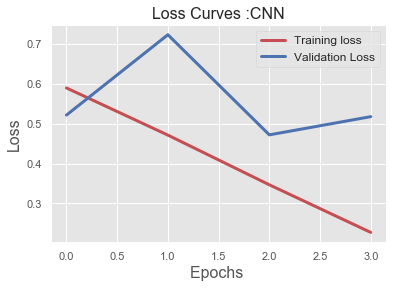

In [963]:
fig1 = plt.figure()
plt.plot(cnn.history['loss'],'r',linewidth=3.0)
plt.plot(cnn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
fig1.savefig('loss_cnn.png')
plt.show()

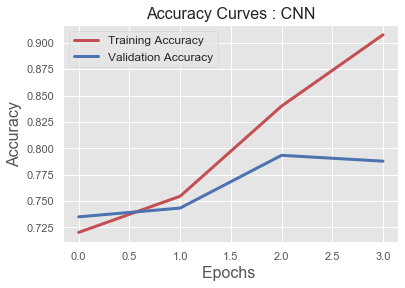

In [964]:
fig2=plt.figure()
plt.plot(cnn.history['acc'],'r',linewidth=3.0)
plt.plot(cnn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : CNN',fontsize=16)
fig2.savefig('accuracy_cnn.png')
plt.show()

In [565]:
#prediction
tokenizer1 = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer1.fit_on_texts(finaldata)
sequences1 = tokenizer1.texts_to_sequences(finaldata)

word_index1 = tokenizer1.word_index
print('Number of Unique Tokens',len(word_index1))

Number of Unique Tokens 2908


In [566]:
data1 = pad_sequences(sequences1, maxlen=MAX_SEQUENCE_LENGTH)


In [568]:

print('Shape of Data Tensor:', data1.shape)


indices1 = np.arange(data1.shape[0])
np.random.shuffle(indices1)
data1 = data1[indices1]





Shape of Data Tensor: (1200, 1000)


In [569]:
embedding_matrix1 = np.random.random((len(word_index1) + 1, EMBEDDING_DIM))
for word, i in word_index1.items():
    embedding_vector1 = embeddings_index.get(word)
    if embedding_vector1 is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix1[i] = embedding_vector1



In [570]:
embedding_layer = Embedding(len(word_index1) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix1],
                            input_length=MAX_SEQUENCE_LENGTH,trainable=True)

In [592]:
y_prob = model.predict(data1) 
y_classes = y_prob.argmax(axis=-1)

In [593]:
y_classes

array([1, 1, 0, ..., 0, 1, 1])

In [594]:
cnn_sentiment=y_classes

#### 9. RNN with bidirectional LSTM

In [530]:
rnndata=reveiws[['review-short','user_sentiment']]

In [531]:
rnndata.shape

(3000, 2)

In [532]:
rnndata['user_sentiment'].value_counts()

0    2170
1     830
Name: user_sentiment, dtype: int64

In [533]:
#rnndata['user_sentiment']=pd.get_dummies(rnndata['user_sentiment'])

In [534]:
macronum=sorted(set(rnndata['user_sentiment']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

rnndata['user_sentiment']=rnndata['user_sentiment'].apply(fun)

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [535]:
macro_to_id

{0: 0, 1: 1}

In [536]:
rnndata.shape

(3000, 2)

In [537]:
texts_rnn = []
labels_rnn = []


In [538]:


for idx in range(0,3000):
    text = BeautifulSoup(rnndata['review-short'][idx])
    texts_rnn.append(clean_str(str(text.get_text().encode())))

for idx in rnndata['user_sentiment']:
    labels_rnn.append(idx)

In [539]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts_rnn)
sequences = tokenizer.texts_to_sequences(texts_rnn)

word_index = tokenizer.word_index
print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 5210


In [540]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels_rnn = to_categorical(np.asarray(labels_rnn))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels_rnn.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels_rnn = labels_rnn[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels_rnn[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels_rnn[-nb_validation_samples:]

Shape of Data Tensor: (3000, 1000)
Shape of Label Tensor: (3000, 2)


In [541]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [542]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [543]:
from keras.layers import Bidirectional, LSTM
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(len(macronum), activation='sigmoid')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM")
model.summary()

Bidirectional LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 1000, 50)          260550    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               120800    
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 402       
Total params: 381,752
Trainable params: 381,752
Non-trainable params: 0
_________________________________________________________________


In [971]:
rnn=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=1, batch_size=2)

Train on 2100 samples, validate on 900 samples
Epoch 1/1
2100/2100 [==============================] - 38s 18ms/step - loss: 0.1345 - acc: 0.9524 - val_loss: 0.5887 - val_acc: 0.8061


In [972]:
y_prob = model.predict(data1) 
y_classes = y_prob.argmax(axis=-1)

In [973]:
rnn_pred=model.predict(data1)

In [ ]:
#prediction

In [ ]:
tokenizer1 = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer1.fit_on_texts(finaldata)
sequences1 = tokenizer1.texts_to_sequences(finaldata)

word_index1 = tokenizer1.word_index
print('Number of Unique Tokens',len(word_index1))

data1 = pad_sequences(sequences1, maxlen=MAX_SEQUENCE_LENGTH)


#labels1_rnn = to_categorical(np.asarray(labels_rnn))
print('Shape of Data Tensor:', data1.shape)
print('Shape of Label Tensor:', labels1_rnn.shape)

indices1 = np.arange(data1.shape[0])
np.random.shuffle(indices)
data1 = data1[indices]
#labels_rnn = labels_rnn[indices]




embedding_matrix = np.random.random((len(word_index1) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

### Predict on test data

In [546]:
#read test data
testdata=pd.read_csv("/Users/pavankumar/Downloads/phd/test-1566619745327.csv")

In [547]:
testdata.head()

,ReviewID,review
0,92876,Was good. Nothing like the original but I beli...
1,92877,I absolutely loved it! A wonderful rendition o...
2,92878,I love the movie! Good job director! \nI appre...
3,92879,"GREAT MOVIE!! Same as the original, but the c..."
4,92880,Realistic. Fantastic special effects


In [548]:
testdata.shape

(1200, 2)

In [549]:
#cleaning testdata
cleaned_test=[]

from nltk.corpus import RegexpTokenizer as regextoken


#function to tokenize, stopword removal and extract adjectives
def cleanme(text):
    sent = text.lower()
    wrds = word_tokenize(sent)

    clwrds = [w for w in wrds if not w in stopwords.words('english')]
    ln = len(clwrds)
    pos = pd.DataFrame(pos_tag(wrds))
    pos = " ".join(list(pos[pos[1].str.contains("JJ")].iloc[:,0]))
    rt = [ln, " ".join(clwrds), pos]
    return(rt)

for i in range(0,1200):
    text=testdata['review'][i]
    a=cleanme(text)
    cleaned_test.append(a)
    


In [1318]:
cleaned_test[2]



[14,
 'love movie ! good job director ! appreciate work great people put years .',
 'good i great']

In [551]:
#remove punctuation through regular expression and create new column
regex=regextoken('\w+')


testdata['review-short']=0

for i in range(0,1200):
    x=regex.tokenize(cleaned_test[i][1])
    testdata['review-short'][i]=x

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/pavankumar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [552]:
testdata.head()

,ReviewID,review,review-short
0,92876,Was good. Nothing like the original but I beli...,"[good, nothing, like, original, believe, point]"
1,92877,I absolutely loved it! A wonderful rendition o...,"[absolutely, loved, wonderful, rendition, orig..."
2,92878,I love the movie! Good job director! \nI appre...,"[love, movie, good, job, director, appreciate,..."
3,92879,"GREAT MOVIE!! Same as the original, but the c...","[great, movie, original, cinematography, made,..."
4,92880,Realistic. Fantastic special effects,"[realistic, fantastic, special, effects]"


In [553]:
#getting some insights from testdata

In [554]:
testdata['polarity']=testdata['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

testdata['subjectivity']=testdata['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

#create new column with vader-sentiment intensity score

testdata['vader-score']=testdata['review'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x))

testdata['vader-score']=testdata['vader-score'].apply(lambda x:x['compound'])

In [555]:
testdata['review-short'] = [' '.join(map(str, l)) for l in testdata['review-short']]

In [558]:
testdata['target']=0

In [804]:
testdata.head()

,ReviewID,review,review-short,polarity,subjectivity,vader-score,target,len
0,92876,Was good. Nothing like the original but I beli...,good nothing like original believe point,0.537500,0.675000,-0.0222,0,8
1,92877,I absolutely loved it! A wonderful rendition o...,absolutely loved wonderful rendition original ...,0.712500,0.887500,0.9224,0,15
2,92878,I love the movie! Good job director! \nI appre...,love movie good job director appreciate work g...,0.766667,0.650000,0.9380,0,14
3,92879,"GREAT MOVIE!! Same as the original, but the c...",great movie original cinematography made huge ...,0.500000,0.631250,0.8264,0,12
4,92880,Realistic. Fantastic special effects,realistic fantastic special effects,0.307937,0.601587,0.7430,0,5


In [560]:
#create column for review length
testdata['len']=0
for i in range (len(testdata)):
    testdata['len'][i]=cleaned_test[i][0]
    

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [561]:
#lematize the short reveiws
testdata['review-short'] = [lmt.lemmatize(i) for i in testdata['review-short']]

In [239]:
#trying out a naive method of prediction considering polarity and vader-score

In [240]:
for i in range (0,1200):
    if testdata['polarity'][i]>0 or testdata['vader-score'][i]>0:
        testdata['target'][i]=0
    else:
        testdata['target'][i]=1

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [241]:
testdata['target'].value_counts()

0    1103
1      97
Name: target, dtype: int64

In [562]:
#taking only reveiw-short column for model prediction
finaldata=testdata['review-short']

In [563]:
finaldata.head()

0             good nothing like original believe point
1    absolutely loved wonderful rendition original ...
2    love movie good job director appreciate work g...
3    great movie original cinematography made huge ...
4                  realistic fantastic special effects
Name: review-short, dtype: object

In [564]:
#getting testdata vector
vectorizer = TfidfVectorizer(ngram_range=(1, 2),use_idf=True)
train_vect=vectorizer.fit_transform(X_train)
testdatavector=vectorizer.transform(finaldata)

In [245]:
#finaldata.to_csv("finaltest.csv")

In [248]:
testdatavector.shape

(1200, 23790)

In [249]:
#creating a new column in testdata and set to 0
testdata['sentiment']=0

In [250]:
#final columns to consider
result=testdata[['ReviewID','sentiment']]

In [617]:
#assign the predictions
result['sentiment']=svc_pred

In [618]:
result['sentiment'].value_counts()

0    949
1    251
Name: sentiment, dtype: int64

In [619]:
#write to csv
result.to_csv('new.csv',index=False)

In [ ]:
#just trying another model with the polarity scores

In [252]:
simplex=reveiws[['polarity','subjectivity','vader-score']]

In [253]:
simpley=reveiws['user_sentiment']

In [254]:
simpletrainx,simpletestx,simpletrainy,simpletesty=train_test_split(simplex,simpley)

In [255]:
simpletest_f=testdata[['polarity','subjectivity','vader-score']]

In [ ]:
pol=svc_model.predict(simpletest_f)

### Model comparison and notes

### clustering of reviews to compare the labels

In [1286]:
X_new=reveiws['review-short'].values

In [1287]:
X_new

array(['every dog lover absolutely love movie',
       'nothing like original still good',
       'pretty much faithful retelling animated classic new look ill certainly take going different direction butchering story nothing original find refreshing many lousy reboots classic films especially late lion king good homage original introduce story whole new generation fans',
       ..., 'like original awesome humor best way watch 3d it fabulous',
       'realization animals great',
       'huge lion king fan posters mugs 1994 vhs watch 2 times tell good really like somehow live animals ca n t compare anime version n t spirit emotions animated version old songs better like stuff better movie go watch'],
      dtype=object)

In [1288]:
vectorizer_new = TfidfVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X_new)

In [1289]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [1290]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
a=model.fit(X_vect)

In [1013]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [1291]:
a.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [1292]:
reveiws['cluster_label']=a.labels_

In [1293]:
reveiws['cluster_label'].value_counts()

0    2625
1     375
Name: cluster_label, dtype: int64

In [1294]:
cluster_table=reveiws[['review','review-short','cluster_label']]

In [1295]:
reveiws.to_csv("clustering.csv",index=False)

In [1296]:
cluster_table['sentiment']=reveiws['user_sentiment']

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1020]:
cluster_table.head()

,review,review-short,cluster_label,sentiment
0,Every dog lover will absolutely love this movie,every dog lover absolutely love movie,0,0
1,Nothing like the original but still good,nothing like original still good,0,0
2,Pretty much a faithful retelling on the animat...,pretty much faithful retelling animated classi...,0,0
3,The original story line was there and the movi...,original story line movie gave feels needed lo...,0,0
4,"there is nothing bad about the movie, I just f...",nothing bad movie felt enjoyed original,0,0


In [1021]:
#counts with initial condition of rating >3 as positive
cluster_table['sentiment'].value_counts()

0    2170
1     830
Name: sentiment, dtype: int64

In [1022]:
#counts as per the kmeans clustering
cluster_table['cluster_label'].value_counts()

0    2625
1     375
Name: cluster_label, dtype: int64

In [1232]:
scores=reveiws[['polarity','subjectivity','vader-score']]

In [1305]:
true_k = 2
model1 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
scores_model=model1.fit(scores)

In [1306]:
cluster_table['scores_cluster']=scores_model.labels_

/Users/pavankumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1307]:
reveiws['scores_cluster']=scores_model.labels_

In [1308]:
cluster_table.to_csv("cluster_compare.csv",index=False)

In [1309]:
cluster_table['scores_cluster'].value_counts()

0    2322
1     678
Name: scores_cluster, dtype: int64

In [1278]:
from sklearn.metrics import silhouette_score

In [1279]:
from sklearn.metrics import pairwise_distances

In [1302]:
pair_dist=pairwise_distances(X_vect)

In [1310]:
pairdist_score=pairwise_distances(scores)

In [1311]:
#for sentiment score based clustering
silhouette_score(scores,scores_model.labels_)

0.5503708989106222

In [1312]:
#for reveiw based clustering
silhouette_score(pair_dist,a.labels_)

0.18887064884016838

In [ ]:
#clustering is better when sentiment scores are considered instead of tf-idf score

#### Comparison and analysis

### More to explore 

# Thank you